### TASK #1: Understand The Problem Statement/Goal

- This dataset contains weekly sales from 99 departments belonging to 45 different stores. 
- Our aim is to forecast weekly sales from a particular department.
- The objective of this case study is to forecast weekly retail store sales based on historical data.
- The data contains holidays and promotional markdowns offered by various stores and several departments throughout the year.
- Markdowns are crucial to promote sales especially before key events such as Super Bowl, Christmas and Thanksgiving. 
- Developing accurate model will enable make informed decisions and make recommendations to improve business processes in the future. 
- The data consists of three sheets: 
    - Stores
    - Features
    - Sales
- Data Source : https://www.kaggle.com/manjeetsingh/retaildataset

### # TASK #2: Import Datasets And Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [3]:
# Import the csv files using pandas
features = pd.read_csv('source_data/Features_data_set.csv')
sales = pd.read_csv('source_data/sales_data_set.csv')
stores = pd.read_csv('source_data/stores_data_set.csv')

In [4]:
# Let's explore the 3 dataframes
    # 'stores' dataframe contains information related to the 45 stores such as type and size of store
print(stores.shape)
stores

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
# Let's explore the 'features' dataframe
    # Features dataframe contains additional data related to the store, department, and regional activity for the given dates.
    # Store: store number
    # Date: week
    # Temperature: average temperature in the region
    # Fuel_Price: cost of fuel in the region
    # MarkDown1-5: anonymized data related to promotional markdowns.
    # CPI: consumer price index.
    # Unemployment: unemployment rate.
    # IsHoliday: wheter the week is a special holiday week or not.

print(features.shape)
features

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [6]:
# Let's explore the "sales" dataframe
    # "Sales" dataframe contains historical sales data, which covers 2010-02-05 to 2012-11-01
    # Store: store number
    # Dept: department number
    # Date: the week
    # Weekly_Sales: sales for the given department in the given store
    # IsHoliday: wheter the week is a special holiday week

print(sales.shape)
sales

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


### TASK #3: Explore Individual Dataset

MINI CHALLENGE
- Use info and describe to individually explore the 3 dataframes
- What is the maximum fuel price? and maximum unemployment numbers?
- What is the average size of the stores?

In [7]:
# Exploring "Features" dataframe
    # Describe
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [8]:
# Exploring "Features" dataframe
    # Info
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
# Exploring "Sales" dataframe
    # Describe
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [10]:
# Exploring "Sales" dataframe
    # Info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
# Exploring "Stores" dataframe
    # Describe
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [12]:
# Exploring "Stores" dataframe
    # Info
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


- What is the maximum fuel price? and maximum unemployment numbers?

In [13]:
print(f'Maximum Fuel Price:', features['Fuel_Price'].max())
print()
print(f'Maximum Unemployment Number:', features['Unemployment'].max())

Maximum Fuel Price: 4.468

Maximum Unemployment Number: 14.313


- What is the average size of the stores?

In [14]:
print(f'The Average Size of the Stores is:', stores['Size'].mean())

The Average Size of the Stores is: 130287.6


In [15]:
# Change the datatype of 'date' column
features['Date'] = pd.to_datetime(features['Date'], infer_datetime_format=True)

sales['Date'] = pd.to_datetime(sales['Date'], infer_datetime_format=True)

/opt/conda/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/conda/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/conda/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19/03/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/conda/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26/03/2010' in DD/MM/YYYY format. Provide format or specify infer_date

In [16]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [17]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-05-10,628.10,False
421567,45,98,2012-12-10,1061.02,False
421568,45,98,2012-10-19,760.01,False


### TASK #4: Merge Dataset Into One DataFrame

In [18]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [19]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [20]:
df= pd.merge(sales, features, on= ['Store', 'Date', 'IsHoliday'])
print(df.shape)
df.head()  

(421570, 14)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [21]:
print(stores.shape)
stores.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [22]:
df = pd.merge(df, stores, on= ['Store'], how= 'left')
print(df.shape)
df.head()

(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [23]:
x = '2010-05-02'
str(x).split('-')

['2010', '05', '02']

MINI CHALLENGE
- Define a function to extract the month information from the dataframe column "Date"
- Apply the function to the entire column "Date" in the merged dataframe "df" and write the output in a column entitled "month"

In [24]:
def get_month(x):
    return int(str(x).split('-')[1])

In [25]:
df['month']= df['Date'].apply(get_month)
print(df.shape)
df.head()

(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5


### TASK #5: Explore Merged Dataset

<AxesSubplot:>

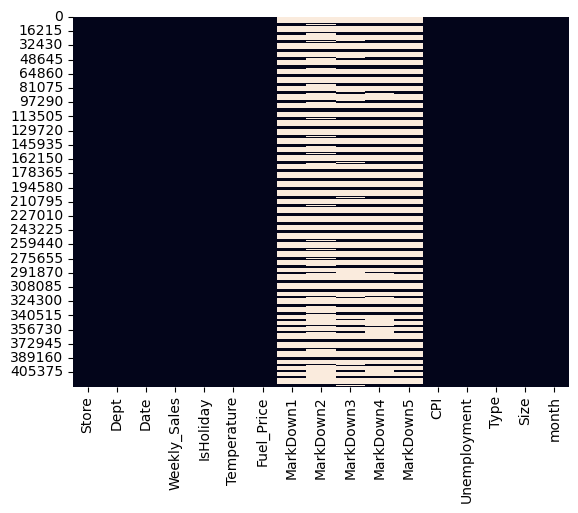

In [26]:
sns.heatmap(df.isnull(), cbar= False)

In [27]:
# Check the number of non-null values in the DataFrame
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
month                0
dtype: int64

In [28]:
# Fill up NaN elements with zeros

df = df.fillna(0)

<AxesSubplot:>

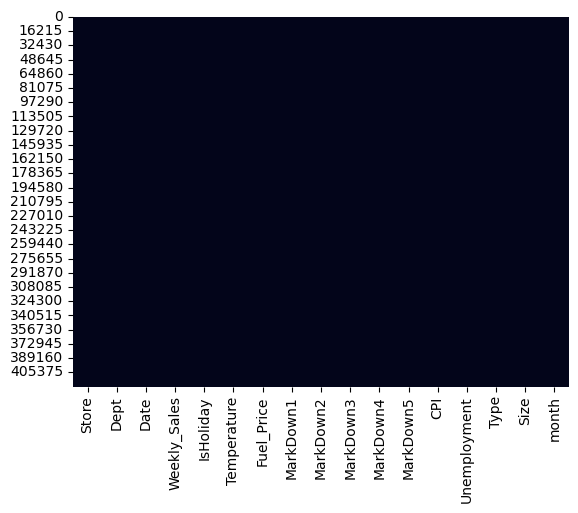

In [29]:
sns.heatmap(df.isnull(), cbar= False)

In [30]:
# Check the number of non-null values in the DataFrame
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
month           0
dtype: int64

In [31]:
# Get some statisticals values from the final df
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,6.478580
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,3.324757
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,4.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,6.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,9.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,12.000000


In [32]:
# Check the number of duplicated entries in the DataFrame
df.duplicated().sum()

0

In [33]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

MINI CHALLENGE
- Replace the "IsHoliday" with ones and zeros instead of True and False (characters with numbers)

In [35]:
df['IsHoliday']= df['IsHoliday'].astype(str)
df['IsHoliday'] = df['IsHoliday'].apply(lambda x: 1 if x == 'True' else 0)
print(df.shape)
df.head()

(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5


### TASK #6: Perform Exploratory Data Analysis

In [37]:
# Create a pivot tables to understand the relationship in the data
result = pd.pivot_table(df, values= 'Weekly_Sales', columns = ['Type'], index= ['Date', 'Store', 'Dept'],
                        aggfunc= np.mean)

In [38]:
result

Type                          A         B   C
Date       Store Dept                        
2010-01-10 1     1     20094.19       NaN NaN
                 2     45829.02       NaN NaN
                 3      9775.17       NaN NaN
                 4     34912.45       NaN NaN
                 5     23381.38       NaN NaN
...                         ...       ...  ..
2012-12-10 45    93         NaN   2644.24 NaN
                 94         NaN   4041.28 NaN
                 95         NaN  49334.77 NaN
                 97         NaN   6463.32 NaN
                 98         NaN   1061.02 NaN

[421570 rows x 3 columns]

In [39]:
result.describe()
# It can be seen that Type A stores have much higher sales than Type B and Type C

Type,A,B,C
count,215478.000000,163495.000000,42597.000000
mean,20099.568043,12237.075977,9519.532538
std,26423.457227,17203.668989,15985.351612
min,-4988.940000,-3924.000000,-379.000000
25%,3315.090000,1927.055000,131.990000
50%,10105.170000,6187.870000,1149.670000
75%,26357.180000,15353.740000,12695.010000
max,474330.100000,693099.360000,112152.350000


In [40]:
result_md= pd.pivot_table(df, values= ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], columns= ['IsHoliday'], index = ['Date', 'Store', 'Dept'],
                          aggfunc= {'MarkDown1':np.mean, 'MarkDown2':np.mean, 'MarkDown3':np.mean, 'MarkDown4':np.mean, 'MarkDown5':np.mean})
                          

In [41]:
result_md

MarkDown1     MarkDown2     MarkDown3     MarkDown4      \
IsHoliday                     0   1         0   1         0   1         0   1   
Date       Store Dept                                                           
2010-01-10 1     1         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 2         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 3         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 4         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 5         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
...                         ...  ..       ...  ..       ...  ..       ...  ..   
2012-12-10 45    93     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 94     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 95     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 97     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 98     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   

                      MarkDown5      
IsHoliday                     0   1  
Date       Store Dept                
2010-01-10 1     1         0.00 NaN  
                 2         0.00 NaN  
                 3         0.00 NaN  
                 4         0.00 NaN  
                 5         0.00 NaN  
...                         ...  ..  
2012-12-10 45    93     3990.54 NaN  
                 94     3990.54 NaN  
                 95     3990.54 NaN  
                 97     3990.54 NaN  
                 98     3990.54 NaN  

[421570 rows x 10 columns]

In [43]:
result_md.sum()

           IsHoliday
MarkDown1  0            1.017371e+09
           1            7.452684e+07
MarkDown2  0            2.310619e+08
           1            1.399088e+08
MarkDown3  0            2.460332e+07
           1            1.727284e+08
MarkDown4  0            4.196331e+08
           1            3.698298e+07
MarkDown5  0            6.585670e+08
           1            4.240793e+07
dtype: float64

In [44]:
result_md.describe()
# we can conclude that MarkDown2 and MarkDown3 have higher volume on holidays compared to that of regular days 
# while other MarkDowns don't show significant changes relating to holiday. (Considering the mean value)

MarkDown1                    MarkDown2                 \
IsHoliday              0             1              0              1   
count      391909.000000  29661.000000  391909.000000   29661.000000   
mean         2595.936803   2512.620778     589.580546    4716.929394   
std          6123.402037   5020.047408    2984.163111   15295.329993   
min             0.000000      0.000000    -265.760000      -9.980000   
25%             0.000000      0.000000       0.000000       0.000000   
50%             0.000000      0.000000       0.000000       0.000000   
75%          2826.570000   2463.160000       0.500000      65.000000   
max         88646.760000  36778.650000   45971.430000  104519.540000   

               MarkDown3                     MarkDown4                \
IsHoliday              0              1              0             1   
count      391909.000000   29661.000000  391909.000000  29661.000000   
mean           62.778142    5823.417900    1070.741151   1246.855336   
std           630.704594   19959.302249    3921.553070   3513.998030   
min           -29.100000       0.000000       0.000000      0.000000   
25%             0.000000       0.000000       0.000000      0.000000   
50%             0.000000       0.000000       0.000000      0.000000   
75%             3.840000      66.080000     442.390000    319.190000   
max         25959.980000  141630.610000   67474.850000  29483.810000   

               MarkDown5                
IsHoliday              0             1  
count      391909.000000  29661.000000  
mean         1680.408001   1429.754053  
std          4312.031598   2427.638027  
min             0.000000      0.000000  
25%             0.000000      0.000000  
50%             0.000000      0.000000  
75%          2182.320000   2069.300000  
max        108519.280000  11100.550000

In [45]:
corr_matrix = df.drop(columns = ['Store']).corr()

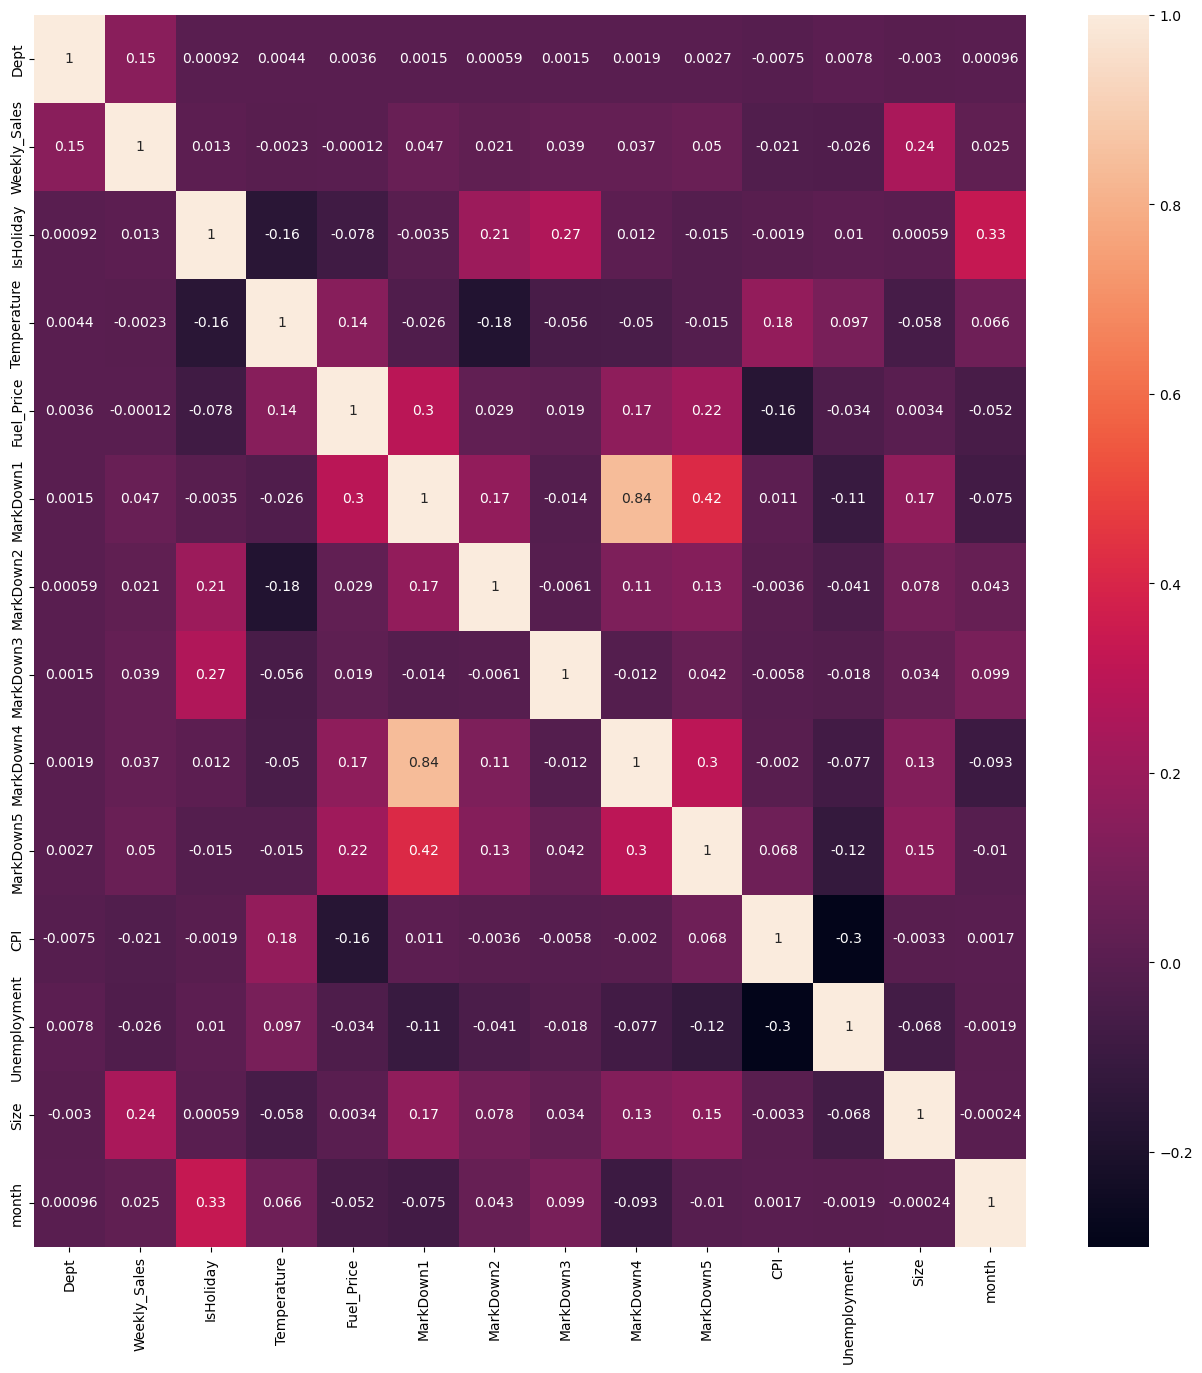

In [46]:
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

### TASK #7: Perform Data Visualization

In [47]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Dept'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>],
       [<AxesSubplot:title={'center':'IsHoliday'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'MarkDown1'}>],
       [<AxesSubplot:title={'center':'MarkDown2'}>,
        <AxesSubplot:title={'center':'MarkDown3'}>,
        <AxesSubplot:title={'center':'MarkDown4'}>,
        <AxesSubplot:title={'center':'MarkDown5'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>,
        <AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

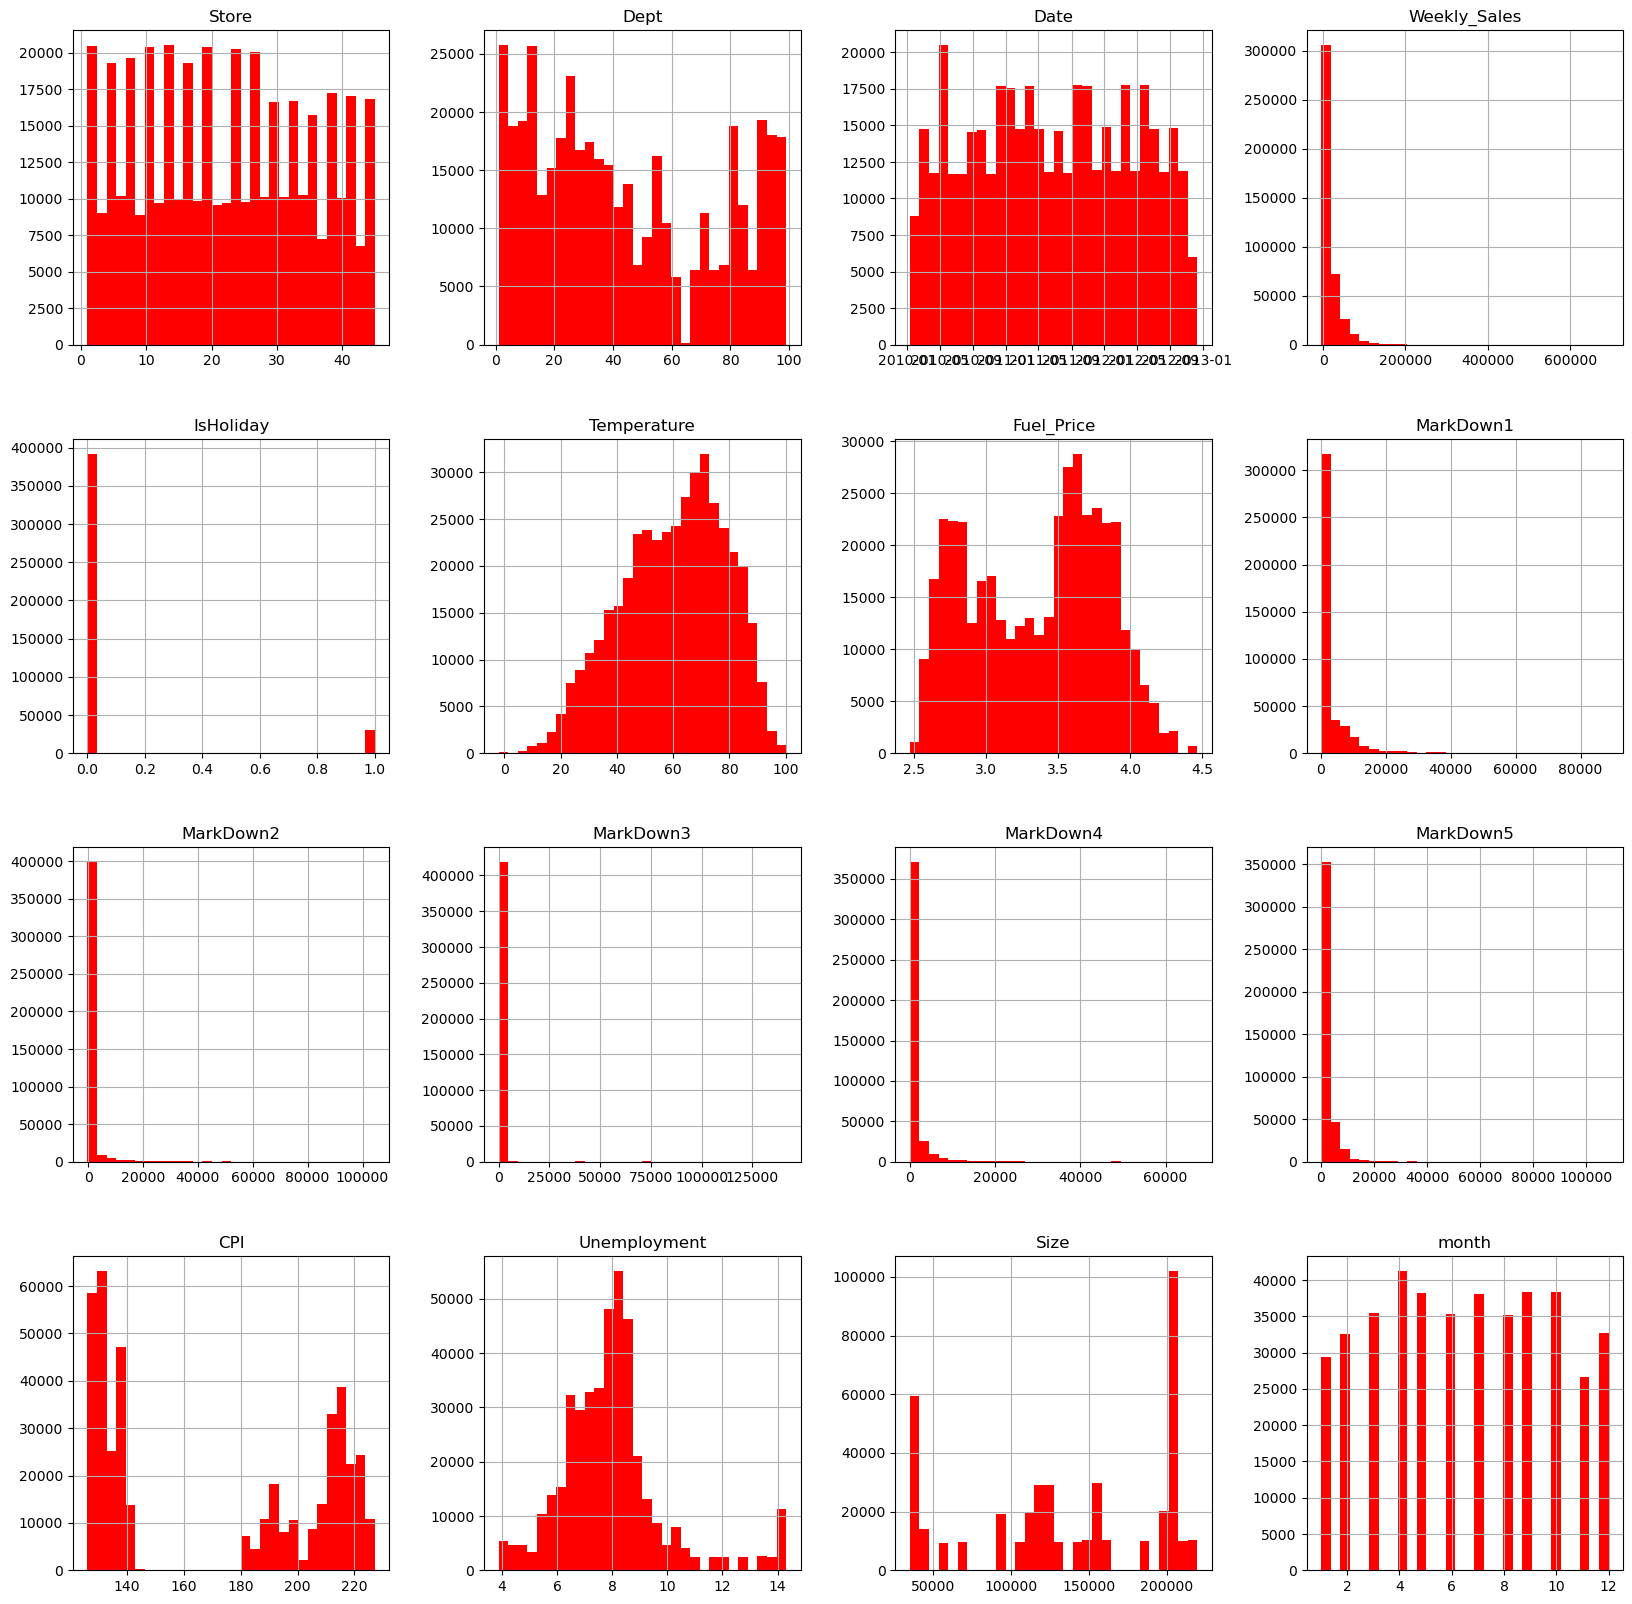

In [48]:
df.hist(bins= 30, figsize= (20,20), color= 'r')

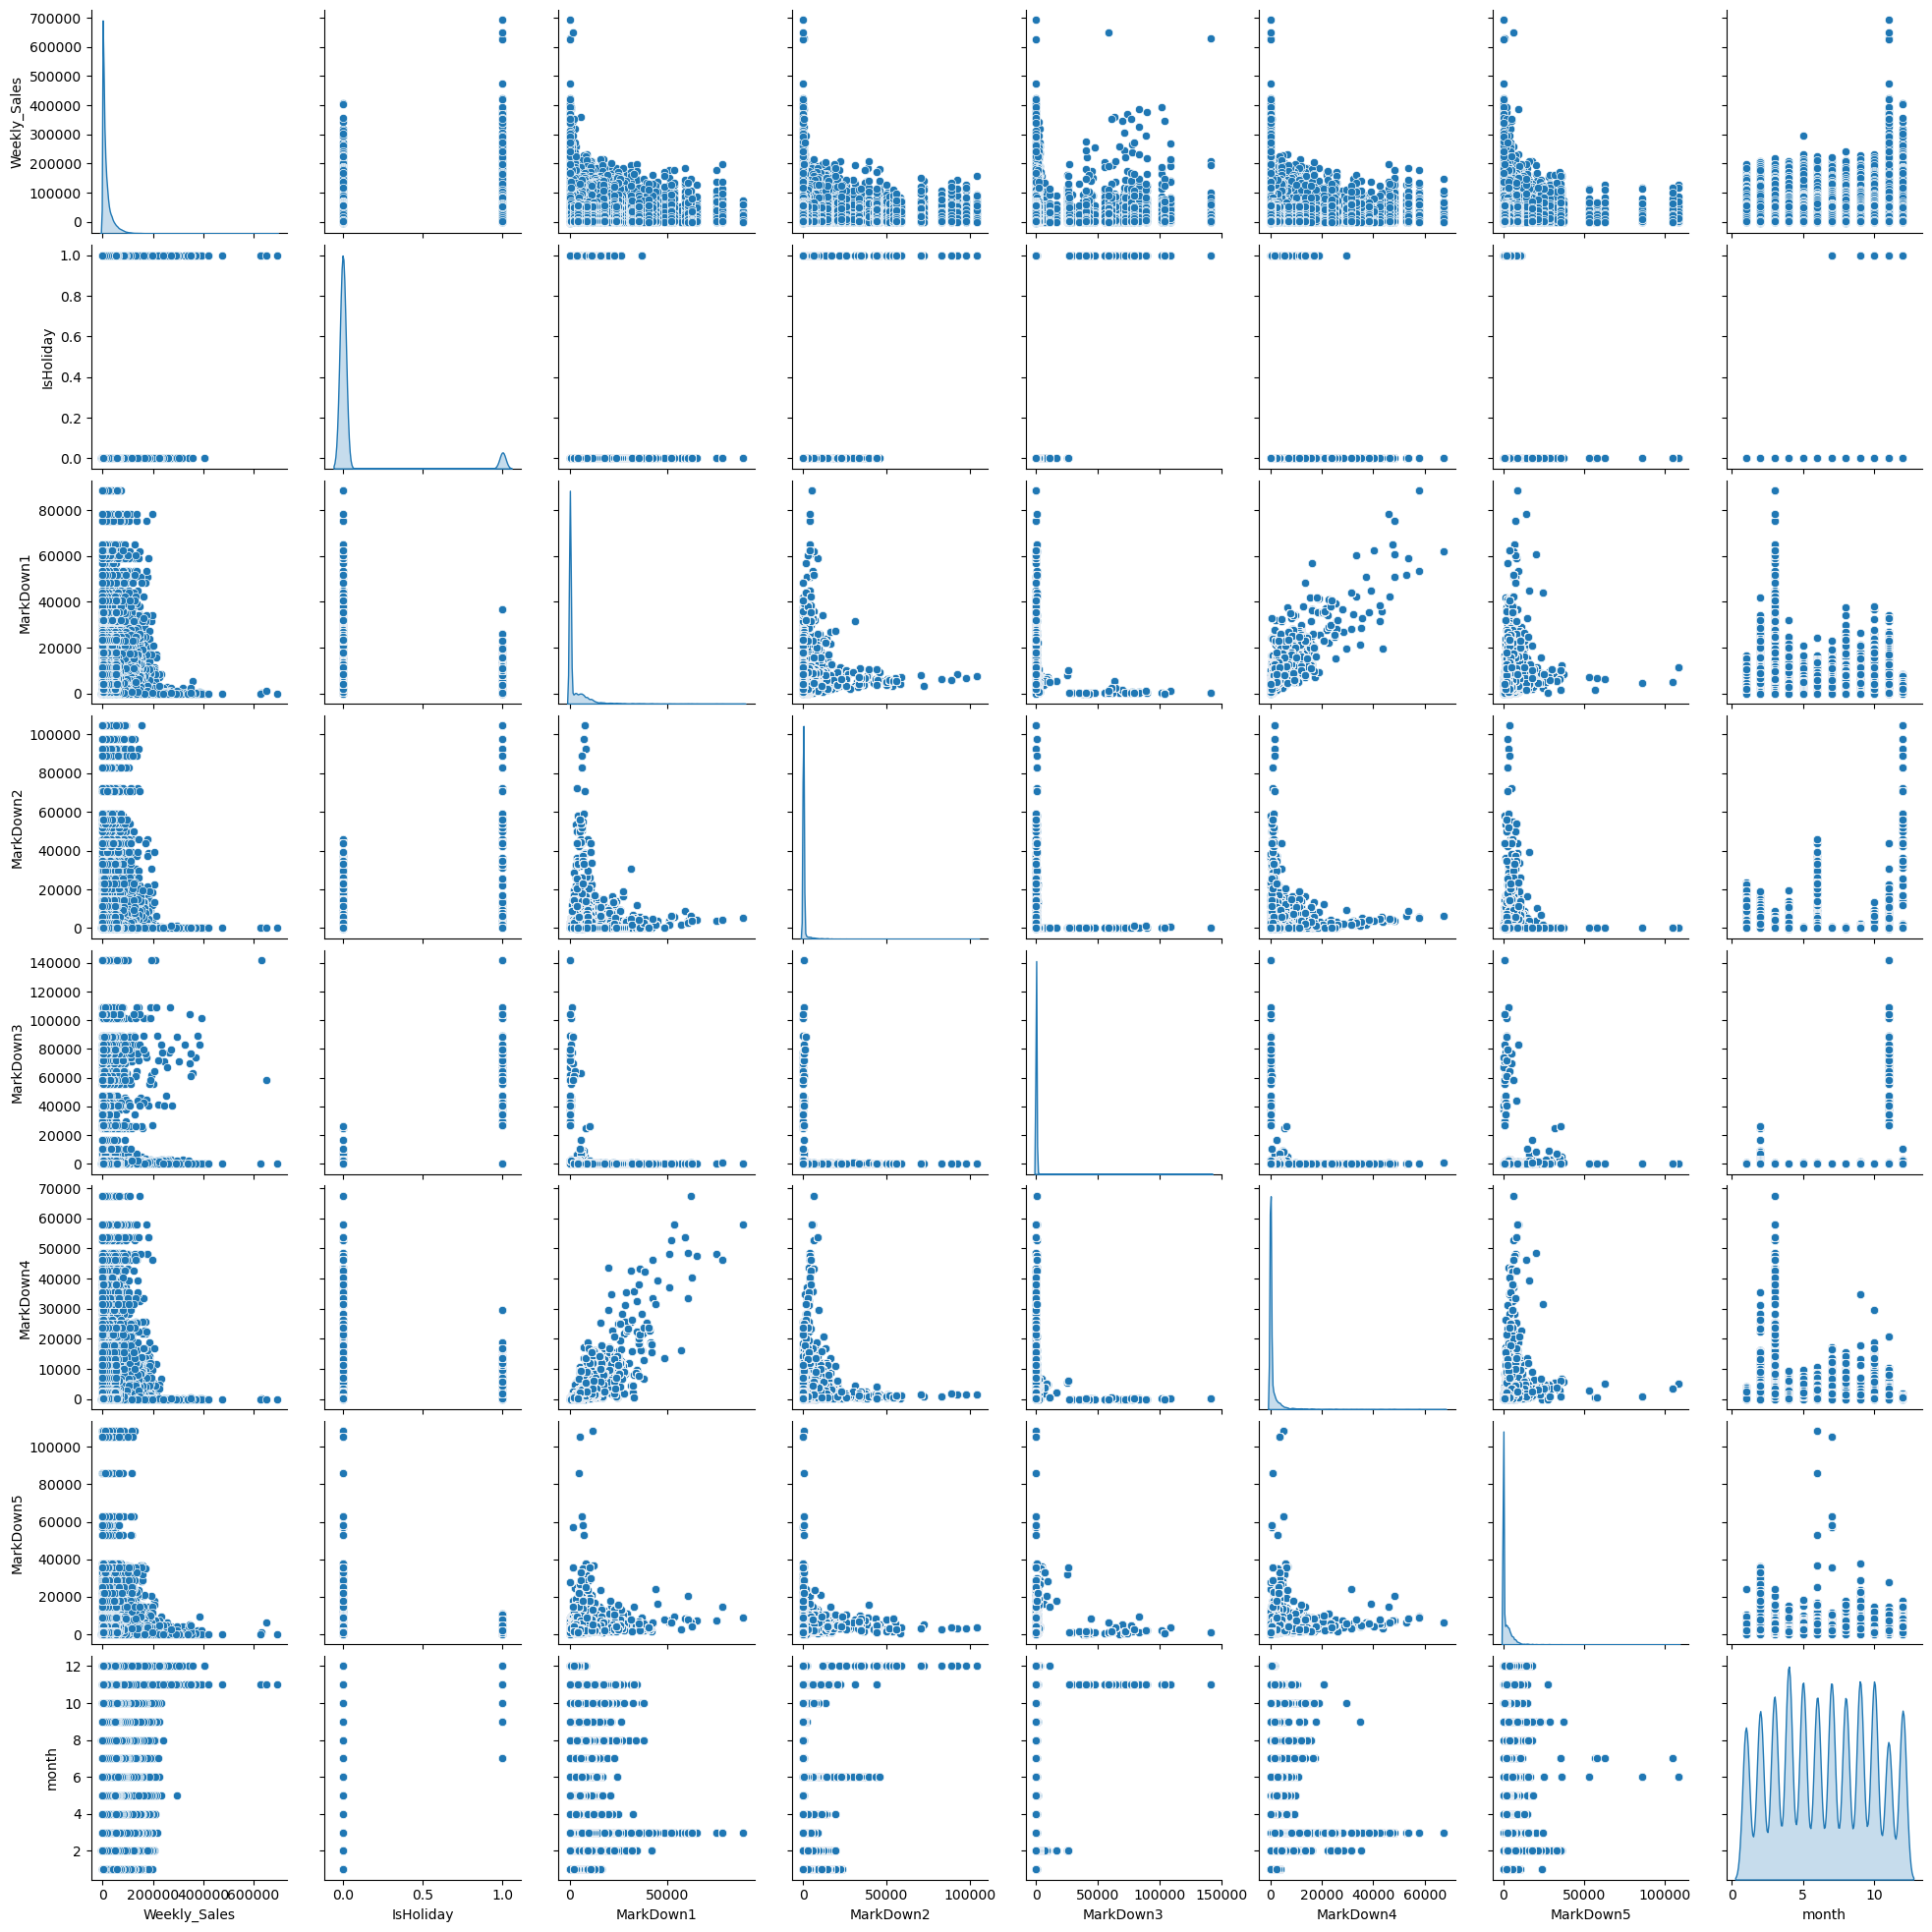

In [49]:
# Visualizing the relationship using pairplots
# there is a relationship between markdown #1 and markdown #4
# holiday and sales
# Weekly sales and markdown #3
sns.pairplot(df[['Weekly_Sales', 'IsHoliday', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Type', 'month']], diag_kind= 'kde')

In [50]:
df_type = df.groupby('Type').mean()

In [51]:
df_type

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
Type,,,,,,,,,,,,,,,
A,21.736419,44.622156,20099.568043,0.070471,60.531945,3.343999,3102.403194,1083.216159,549.644930,1325.891281,2147.830168,174.408895,7.791595,182231.285486,6.480030
B,18.450417,43.112273,12237.075977,0.070412,57.562951,3.382523,2553.465968,827.500452,481.215226,1043.927675,1324.921913,167.176656,7.928836,101818.735827,6.478100
C,38.942015,46.836350,9519.532538,0.069582,67.554266,3.364654,138.960203,53.274338,5.142226,5.603993,505.826631,170.429314,8.934350,40535.725286,6.473085


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

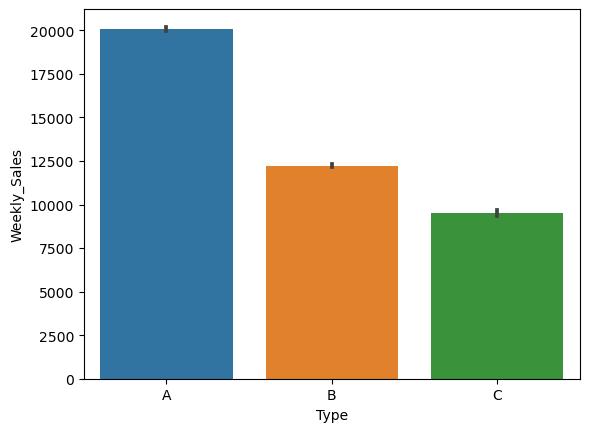

In [52]:
sns.barplot(x = df['Type'], y = df['Weekly_Sales'], data = df)

In [53]:
df_dept= df.groupby('Dept').mean()
df_dept

,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
Dept,,,,,,,,,,,,,,
1,23.000000,19213.485088,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
2,23.000000,43607.020113,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
3,23.000000,11793.698516,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
4,23.000000,25974.630238,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
5,22.757366,21365.583515,0.069797,60.559367,3.365397,2462.697233,830.226332,435.134596,1022.858240,1603.738276,171.109374,7.978057,131530.357964,6.479439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.000000,69824.423080,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
96,23.258138,15210.942761,0.069839,61.539285,3.359920,2362.845647,820.762363,397.214137,999.452087,1660.599345,171.562686,7.849295,129282.010507,6.482489
97,23.357439,14255.576919,0.069767,60.490781,3.362418,2463.638764,833.096524,432.439341,1025.957821,1591.276367,170.445933,8.043564,130676.377190,6.477700


<AxesSubplot:ylabel='Dept'>

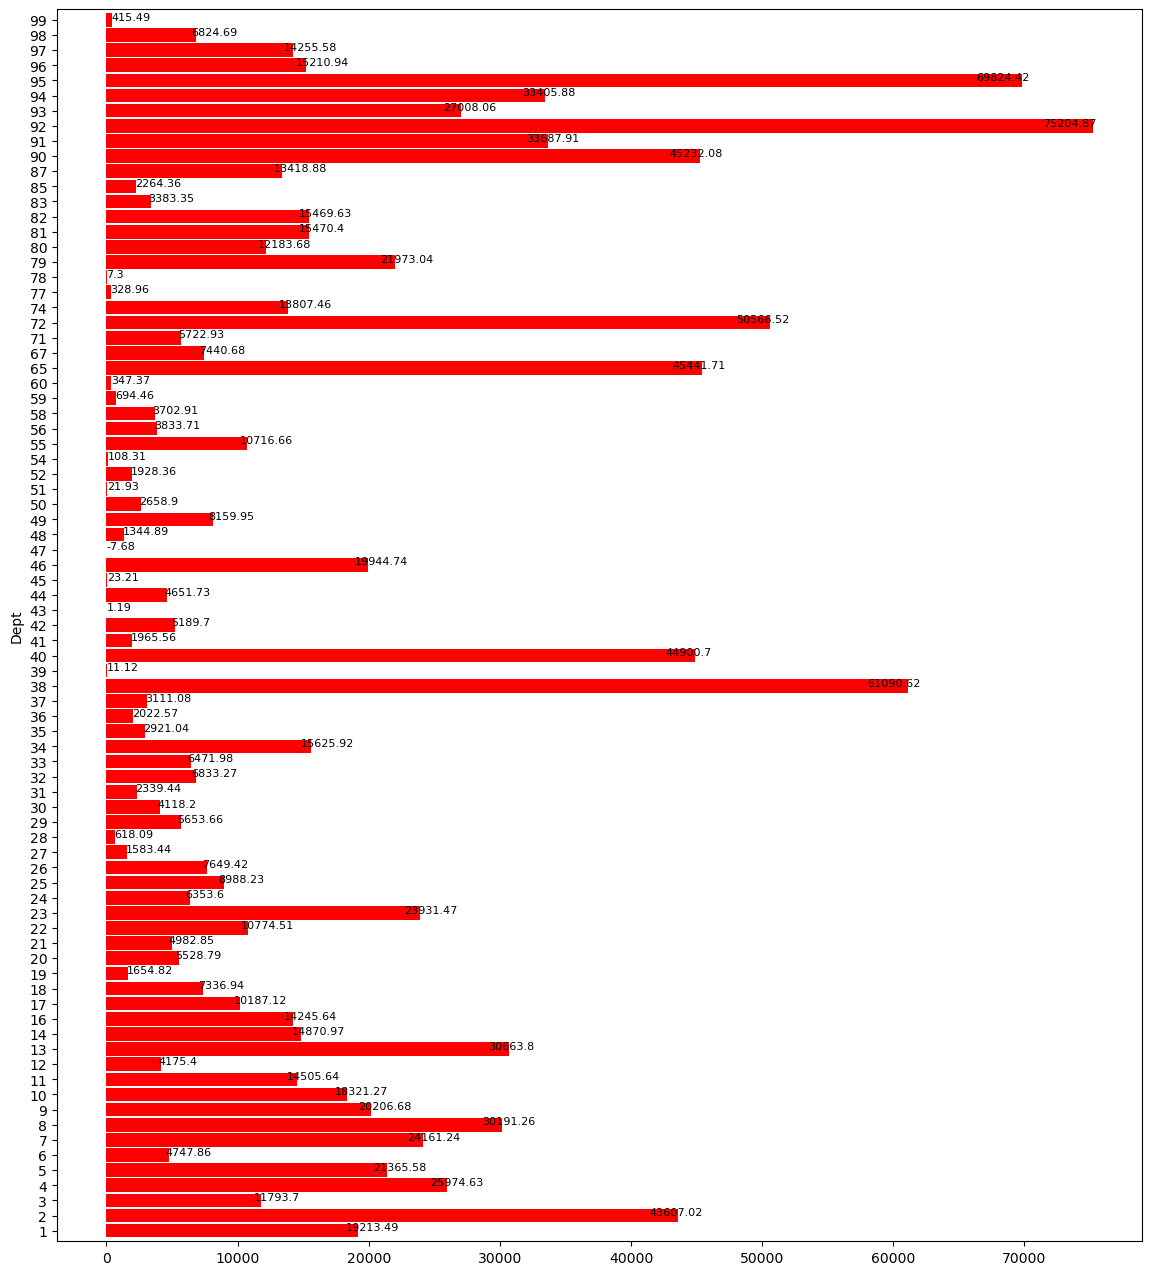

In [65]:
fig = plt.figure(figsize= (14,16))
for i, bar in enumerate(df_dept['Weekly_Sales']):
    plt.text(bar*0.95, i, str(round(bar, 2)), ha='left', va='baseline', fontsize=8)
df_dept['Weekly_Sales'].plot(kind= 'barh', color= 'r', width= 0.9)

<AxesSubplot:ylabel='Dept'>

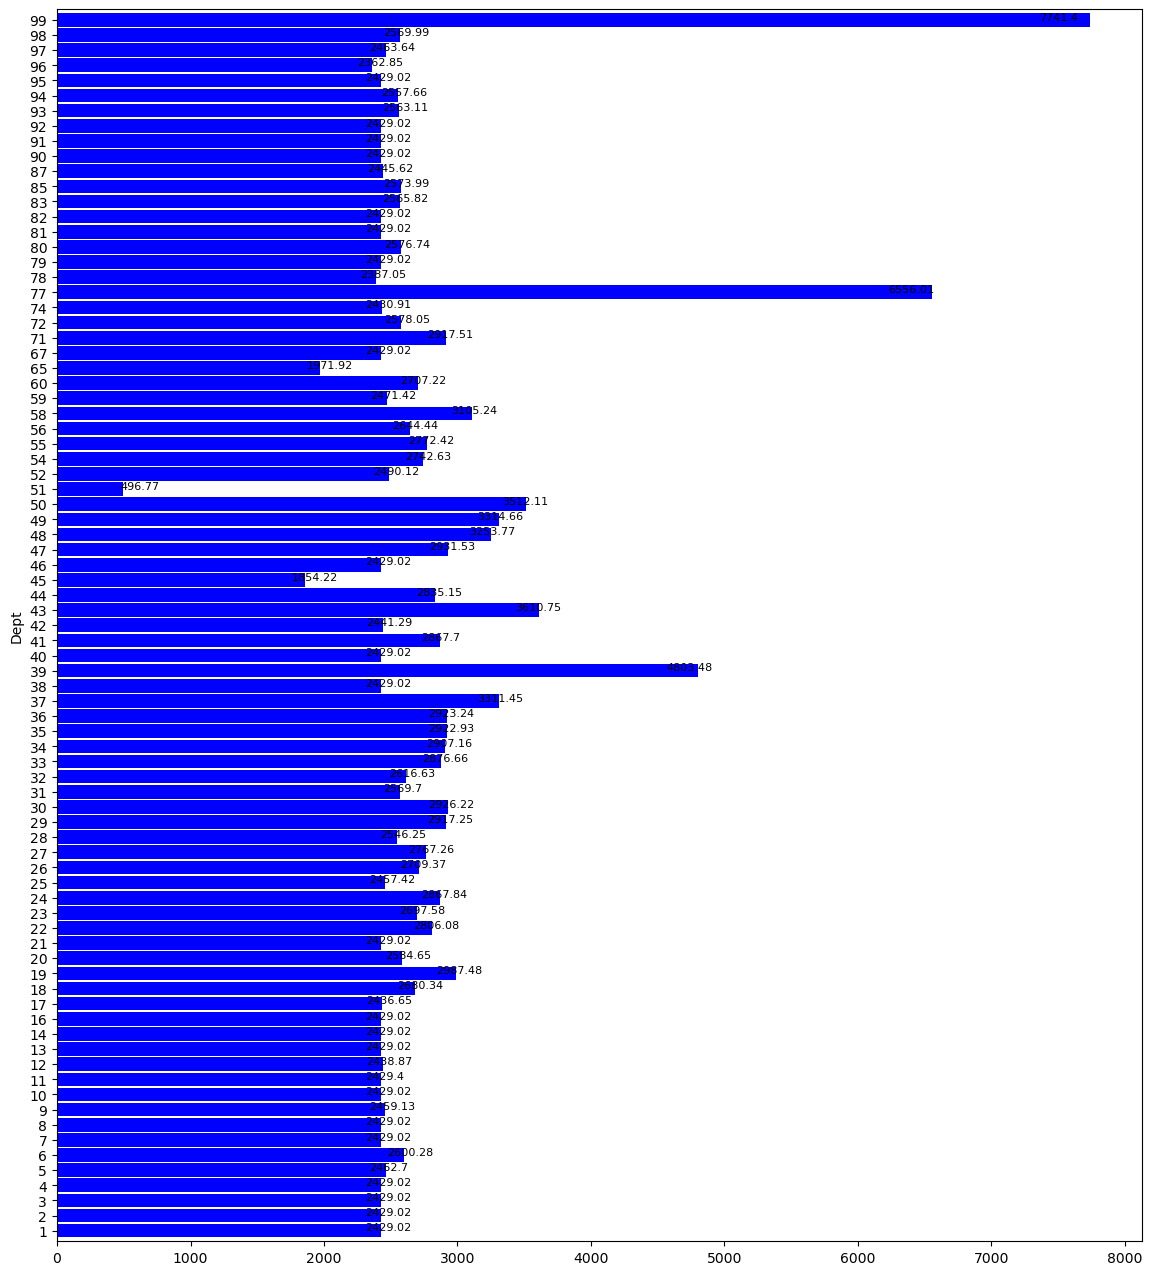

In [67]:
fig = plt.figure(figsize= (14,16))
for i, bar in enumerate(df_dept['MarkDown1']):
    plt.text(bar*0.95, i, str(round(bar, 2)), ha='left', va='baseline', fontsize=8)
df_dept['MarkDown1'].plot(kind= 'barh', color= 'blue', width= 0.9)

<AxesSubplot:ylabel='Dept'>

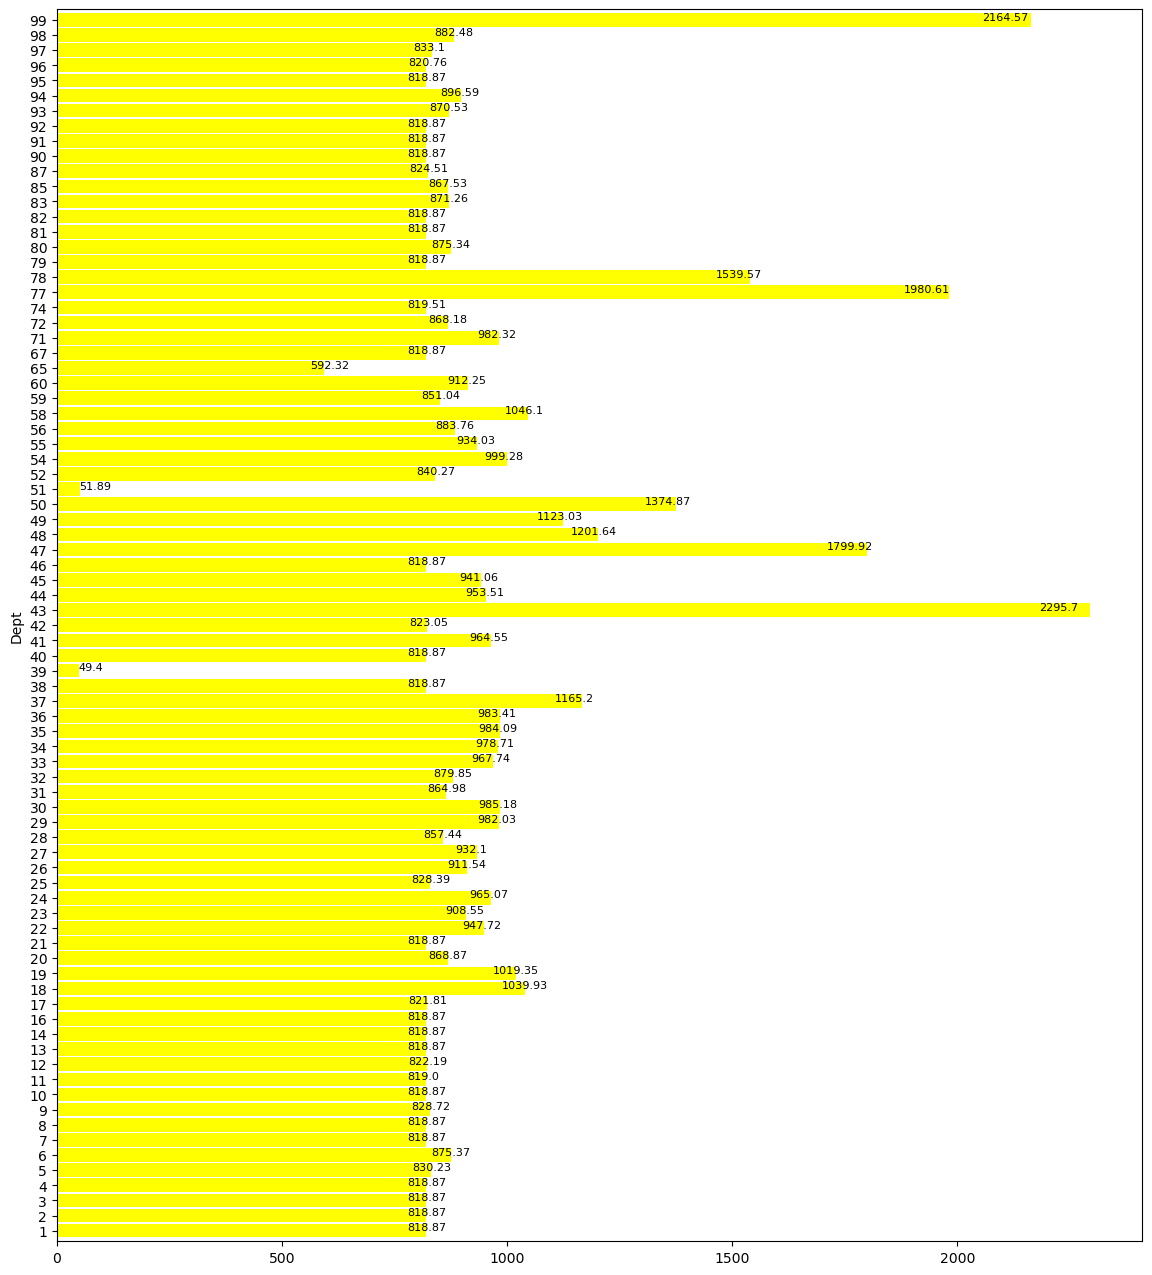

In [68]:
fig = plt.figure(figsize= (14,16))
for i, bar in enumerate(df_dept['MarkDown2']):
    plt.text(bar*0.95, i, str(round(bar, 2)), ha='left', va='baseline', fontsize=8)
df_dept['MarkDown2'].plot(kind= 'barh', color= 'yellow', width= 0.9)

<AxesSubplot:ylabel='Dept'>

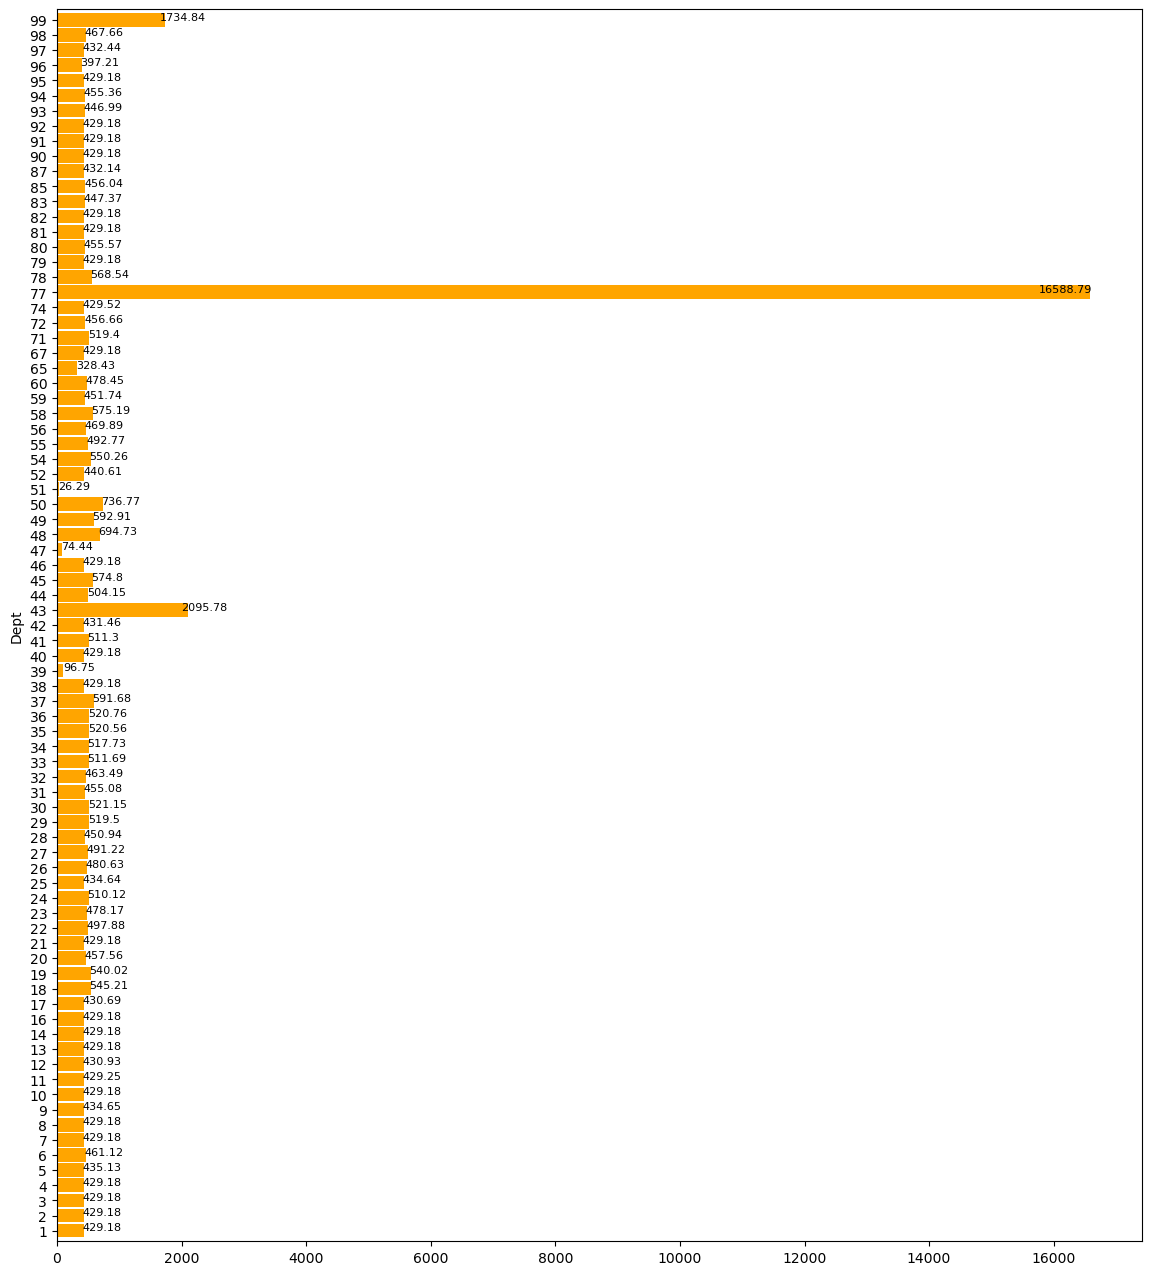

In [71]:
fig = plt.figure(figsize= (14,16))
for i, bar in enumerate(df_dept['MarkDown3']):
    plt.text(bar*0.95, i, str(round(bar, 2)), ha='left', va='baseline', fontsize=8)
df_dept['MarkDown3'].plot(kind= 'barh', color= 'orange', width= 0.9)

<AxesSubplot:ylabel='Dept'>

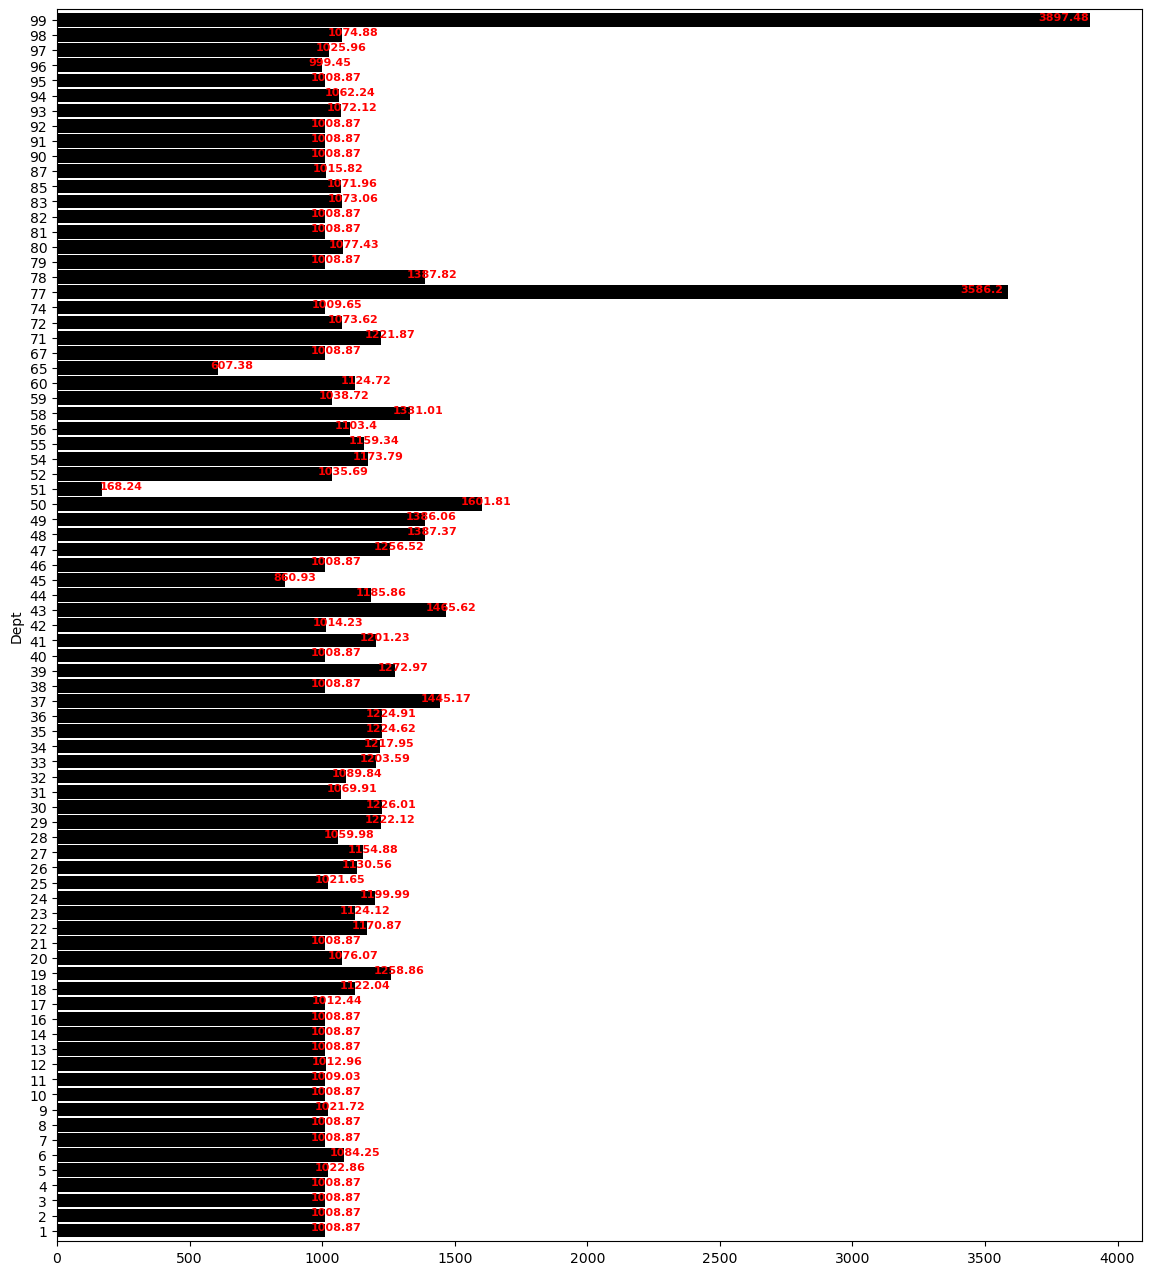

In [75]:
fig = plt.figure(figsize= (14,16))
for i, bar in enumerate(df_dept['MarkDown4']):
    plt.text(bar*0.95, i, str(round(bar, 2)), ha='left', va='baseline', fontsize=8, color= 'red', fontweight='bold')
df_dept['MarkDown4'].plot(kind= 'barh', color= 'black', width= 0.9)

<AxesSubplot:ylabel='Dept'>

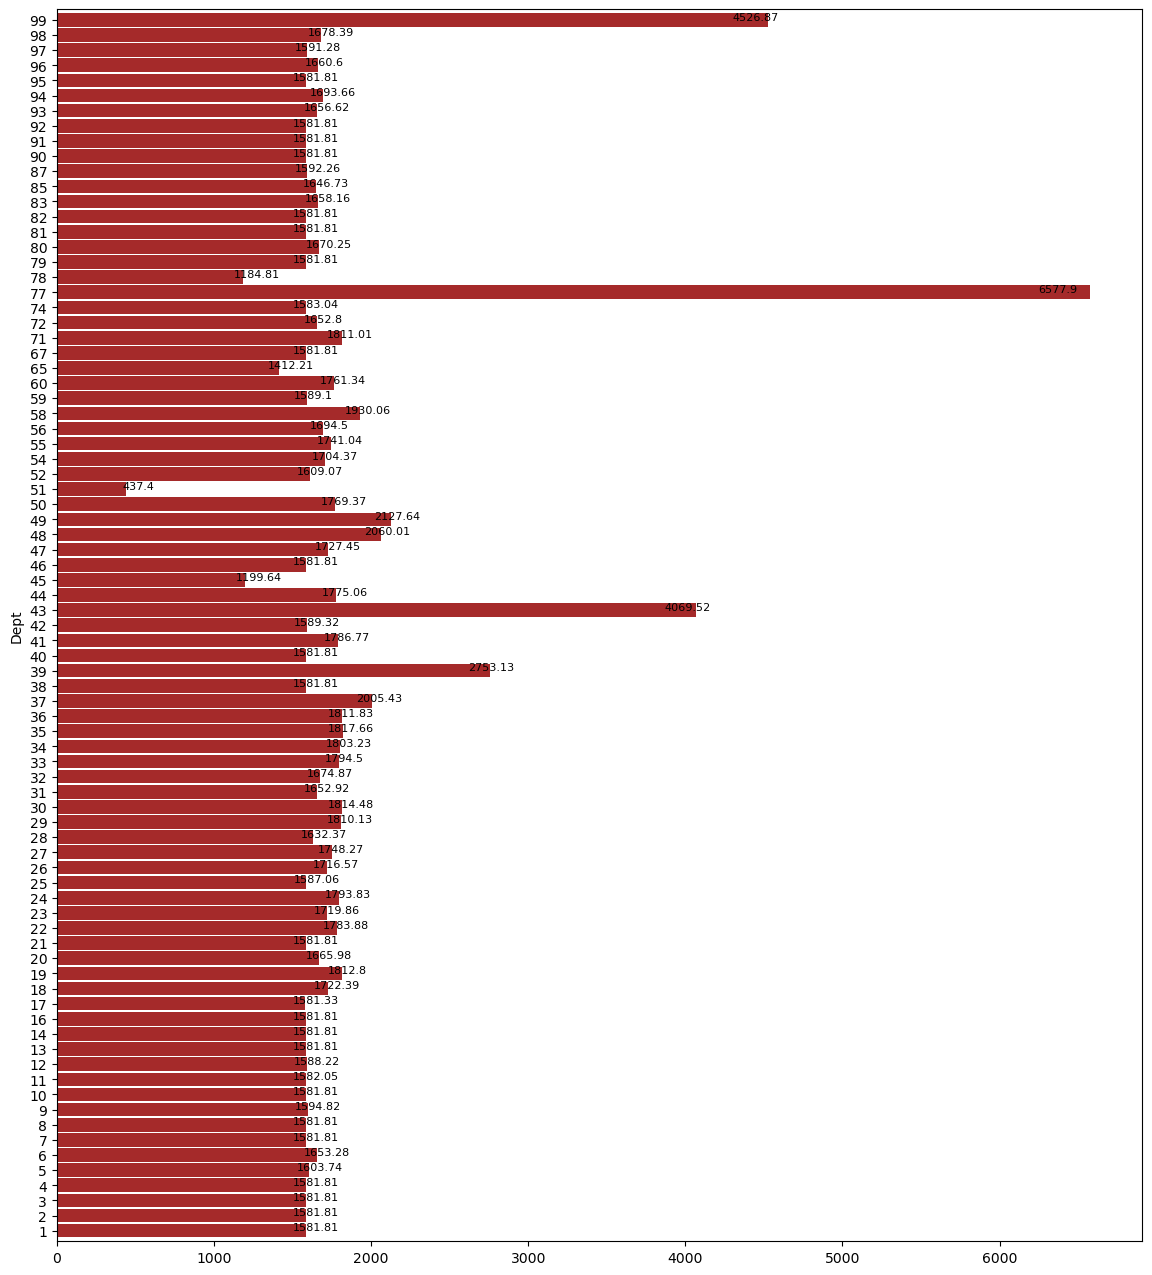

In [76]:
fig = plt.figure(figsize= (14,16))
for i, bar in enumerate(df_dept['MarkDown5']):
    plt.text(bar*0.95, i, str(round(bar, 2)), ha='left', va='baseline', fontsize=8)
df_dept['MarkDown5'].plot(kind= 'barh', color= 'brown', width= 0.9)

- We can conclude that departments that have poor weekly sales have been assigned high number of markdowns. Let's explore this in more details
- Example: check out store 77 and 99

In [77]:
# Sort by weekly sales
df_dept_sale= df_dept.sort_values(by= ['Weekly_Sales'], ascending= True)
df_dept_sale['Weekly_Sales'][:30]

Dept
47      -7.682554
43       1.193333
78       7.296638
39      11.123750
51      21.931729
45      23.211586
54     108.305985
77     328.961800
60     347.370229
99     415.487065
28     618.085116
59     694.463564
48    1344.893576
27    1583.437727
19    1654.815030
52    1928.356252
41    1965.559998
36    2022.571061
85    2264.359407
31    2339.440287
50    2658.897010
35    2921.044946
37    3111.076193
83    3383.349838
58    3702.907419
56    3833.706211
30    4118.197208
12    4175.397021
44    4651.729658
6     4747.856188
Name: Weekly_Sales, dtype: float64

### TASK #8: Prepare The Data Before Training

In [78]:
# Drop the date
df_target = df['Weekly_Sales']
df_final = df.drop(columns = ['Weekly_Sales', 'Date'])

In [79]:
df_target

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [80]:
df_final

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
1,1,2,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
2,1,3,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
3,1,4,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
4,1,5,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


In [81]:
# Create dummy variables
df_final = pd.get_dummies(df_final, columns = ['Type', 'Store', 'Dept'], drop_first = True)
print(df_final)
df_final.head()

        IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0               0        42.31       2.572       0.00       0.00        0.0   
1               0        42.31       2.572       0.00       0.00        0.0   
2               0        42.31       2.572       0.00       0.00        0.0   
3               0        42.31       2.572       0.00       0.00        0.0   
4               0        42.31       2.572       0.00       0.00        0.0   
...           ...          ...         ...        ...        ...        ...   
421565          0        58.85       3.882    4018.91      58.08      100.0   
421566          0        58.85       3.882    4018.91      58.08      100.0   
421567          0        58.85       3.882    4018.91      58.08      100.0   
421568          0        58.85       3.882    4018.91      58.08      100.0   
421569          0        58.85       3.882    4018.91      58.08      100.0   

        MarkDown4  MarkDown5         CPI  Unemploym

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
2,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
3,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
4,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0


In [82]:
print(df_final.shape)
df_final.head()

(421570, 138)


,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
2,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
3,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
4,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0


In [83]:
print(df_target.shape)
print()
print(df_final.shape)

(421570,)

(421570, 138)


In [84]:
# Convert df_final and df_target DataFrames to numpy arrays
X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')

In [85]:
X

array([[ 0.   , 42.31 ,  2.572, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 42.31 ,  2.572, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 42.31 ,  2.572, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   , 58.85 ,  3.882, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 58.85 ,  3.882, ...,  1.   ,  0.   ,  0.   ],
       [ 0.   , 58.85 ,  3.882, ...,  0.   ,  1.   ,  0.   ]],
      dtype=float32)

In [86]:
y

array([24924.5 , 50605.27, 13740.12, ..., 56017.47,  6817.48,  1076.8 ],
      dtype=float32)

In [87]:
print(X.shape)

(421570, 138)


In [88]:
print(y.shape)

(421570,)


In [89]:
# Reshaping the array from (421570,) to (421570,1)
y = y.reshape(-1,1)
y.shape

(421570, 1)